<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/RajShahu_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Read data from the file “pima-indians-diabetes.data”.


In [55]:
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

In [56]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Step 2: Calculate the correlation of the features (columns)

In [57]:
correlation_original = df.corr()

In [58]:
print(correlation_original)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Class                        0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Step 3: Rescale it to scale the data into the range of (0,1)

In [59]:
scaler = MinMaxScaler()
data_rescaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(data_rescaled.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age       Class  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  

# Step 4 (i): Calculate the correlation of the features for the rescaled data.

In [60]:
correlation_rescaled = data_rescaled.corr()


In [61]:
print(correlation_rescaled)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Class                        0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Step 4 (ii): Check if the correlations have changed

In [62]:
difference_in_correlation = correlation_rescaled - correlation_original

# Check if any value in the difference matrix is significantly different from zero
correlations_changed = not (difference_in_correlation.abs() < 1e-10).all().all()

print(f"correlations_changed = ", correlations_changed)
print(f"Have the correlations changed? {'Yes' if correlations_changed else 'No'}")

correlations_changed =  False
Have the correlations changed? No


# Step 5: Group that by ‘class’

In [63]:
grouped_data = data_rescaled.groupby('Class')
grouped_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
10,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.0


# Step 6: Plot the histograms of the data for each group.

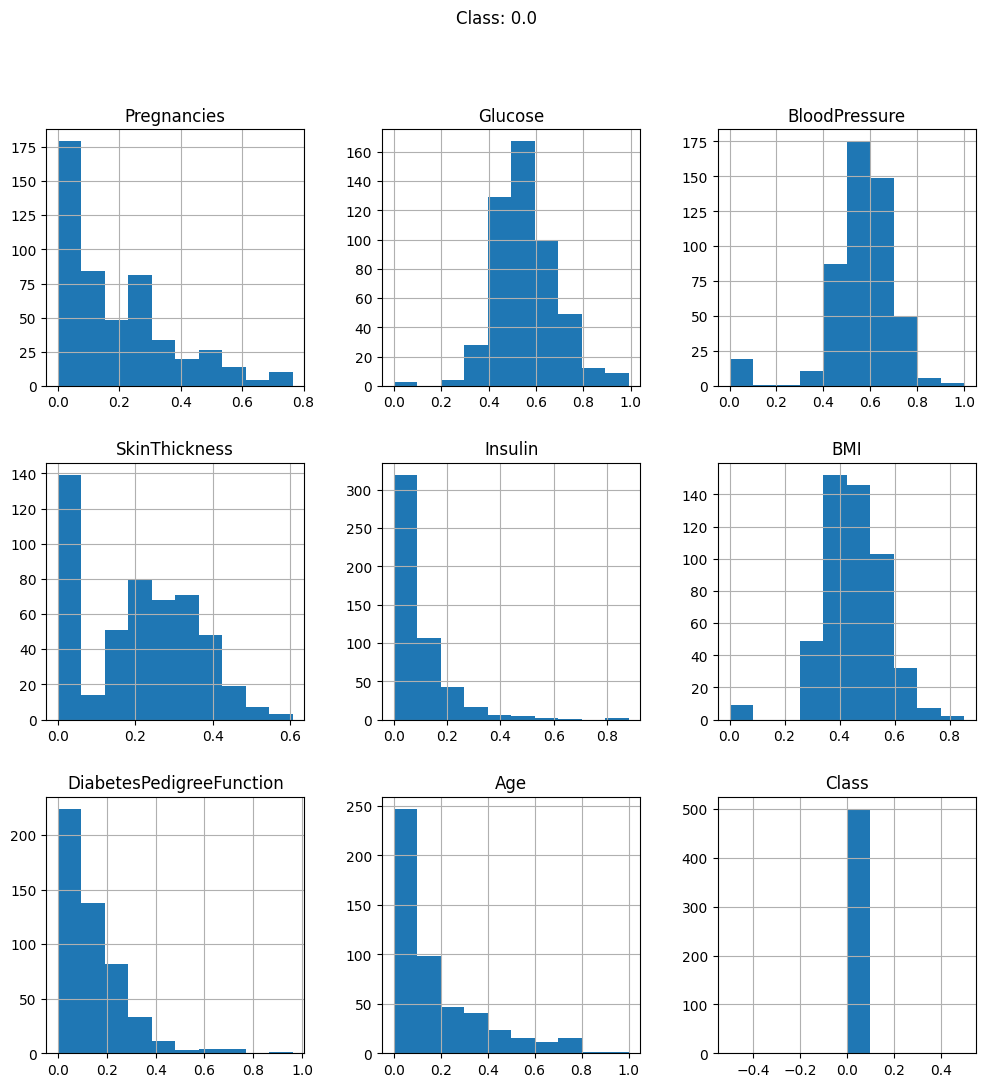

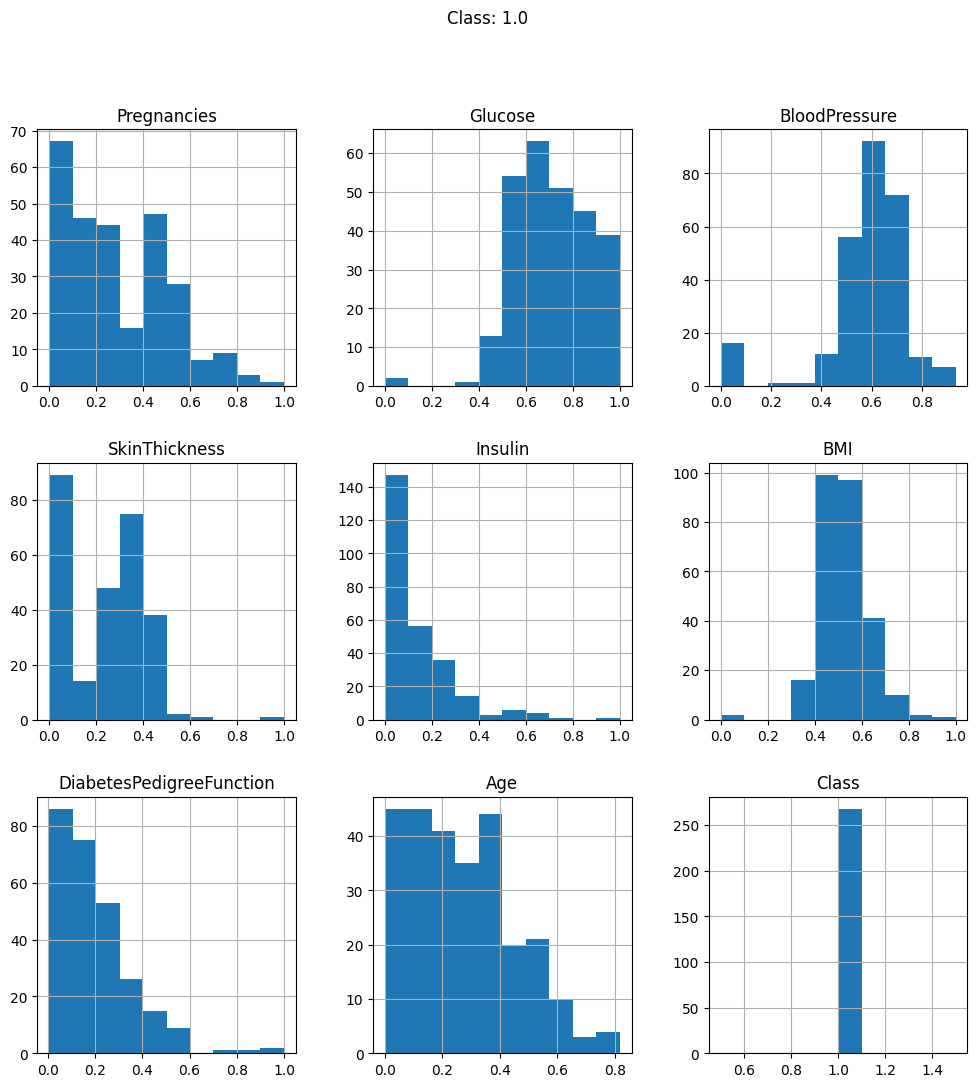

In [64]:
for name, group in grouped_data:
    group.hist(figsize=(12, 12))
    plt.suptitle(f'Class: {name}')
    plt.show()

# Step 7: Calculate the correlation of the features (columns) over each group.

In [65]:

correlation_grouped = grouped_data.corr()
correlation_grouped

Pregnancies   Glucose  BloodPressure  \
Class                                                                  
0.0   Pregnancies                  1.000000  0.098685       0.133096   
      Glucose                      0.098685  1.000000       0.192795   
      BloodPressure                0.133096  0.192795       1.000000   
      SkinThickness               -0.118340  0.016015       0.187072   
      Insulin                     -0.131986  0.352957       0.074626   
      BMI                          0.016495  0.131749       0.363178   
      DiabetesPedigreeFunction    -0.079951  0.095548       0.027292   
      Age                          0.572776  0.228018       0.214694   
1.0   Pregnancies                  1.000000 -0.054591       0.126963   
      Glucose                     -0.054591  1.000000       0.068699   
      BloodPressure                0.126963  0.068699       1.000000   
      SkinThickness               -0.079165  0.037618       0.225247   
      Insulin                     -0.078563  0.261368       0.089367   
      BMI                         -0.159071  0.050418       0.133951   
      DiabetesPedigreeFunction    -0.069195  0.026474       0.034522   
      Age                          0.444987  0.098565       0.262684   

                                SkinThickness   Insulin       BMI  \
Class                                                               
0.0   Pregnancies                   -0.118340 -0.131986  0.016495   
      Glucose                        0.016015  0.352957  0.131749   
      BloodPressure                  0.187072  0.074626  0.363178   
      SkinThickness                  1.000000  0.412790  0.438606   
      Insulin                        0.412790  1.000000  0.254202   
      BMI                            0.438606  0.254202  1.000000   
      DiabetesPedigreeFunction       0.095181  0.227385  0.070664   
      Age                           -0.163788 -0.149234  0.036070   
1.0   Pregnancies                   -0.079165 -0.078563 -0.159071   
      Glucose                        0.037618  0.261368  0.050418   
      BloodPressure                  0.225247  0.089367  0.133951   
      SkinThickness                  1.000000  0.456558  0.312058   
      Insulin                        0.456558  1.000000  0.055112   
      BMI                            0.312058  0.055112  1.000000   
      DiabetesPedigreeFunction       0.273900  0.101565  0.136761   
      Age                           -0.092012  0.023944 -0.188012   

                                DiabetesPedigreeFunction       Age  
Class                                                               
0.0   Pregnancies                              -0.079951  0.572776  
      Glucose                                   0.095548  0.228018  
      BloodPressure                             0.027292  0.214694  
      SkinThickness                             0.095181 -0.163788  
      Insulin                                   0.227385 -0.149234  
      BMI                                       0.070664  0.036070  
      DiabetesPedigreeFunction                  1.000000  0.041665  
      Age                                       0.041665  1.000000  
1.0   Pregnancies                              -0.069195  0.444987  
      Glucose                                   0.026474  0.098565  
      BloodPressure                             0.034522  0.262684  
      SkinThickness                             0.273900 -0.092012  
      Insulin                                   0.101565  0.023944  
      BMI                                       0.136761 -0.188012  
      DiabetesPedigreeFunction                  1.000000 -0.088119  
      Age                                      -0.088119  1.000000

# Step 8: Calculate the difference between the correlation matrix of each group and the whole data set (item 2 above)

In [66]:
correlation_difference_class_0 = correlation_grouped.loc[0].subtract(correlation_original)
correlation_difference_class_1 = correlation_grouped.loc[1].subtract(correlation_original)

correlation_group_0 = correlation_grouped.loc[0]
correlation_group_1 = correlation_grouped.loc[1]

# correlation_group_0, correlation_group_1, correlation_difference_class_0, correlation_difference_class_1
# [correlation_group_0, correlation_group_1, correlation_difference_class_0, correlation_difference_class_1]
print(correlation_group_0)
print(correlation_group_1)
print(correlation_difference_class_0)
print(correlation_difference_class_1)



                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.098685       0.133096      -0.118340   
Glucose                      0.098685  1.000000       0.192795       0.016015   
BloodPressure                0.133096  0.192795       1.000000       0.187072   
SkinThickness               -0.118340  0.016015       0.187072       1.000000   
Insulin                     -0.131986  0.352957       0.074626       0.412790   
BMI                          0.016495  0.131749       0.363178       0.438606   
DiabetesPedigreeFunction    -0.079951  0.095548       0.027292       0.095181   
Age                          0.572776  0.228018       0.214694      -0.163788   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.131986  0.016495                 -0.079951   
Glucose                   0.352957  0.131749                  0.095548   
BloodPressure             0.074626  0.363178    